In [50]:
import pickle
import pandas as pd
from CITEsort.BTreeTraversal import BTreeTraversal
from CITEsort.Visualize import plot_keymarker,visualize_tree
import matplotlib
#import numpy as np
from matplotlib import pyplot as plt

## load data and tree 

In [79]:
# data = pd.read_csv('datasets/SeuratV4/adt_main_clr.csv',header=0,index_col=0)

# data = pd.read_csv('./datasets/SeuratV4/adt_p8_main_clr.csv',header=0,index_col=0)
id ='1_4'
data = pd.read_csv('../simulator_out/ADT_simulator_'+id+'.csv')
data.index = data.index.astype(str)

f = open('../output/'+id+'/tree.pickle','rb')
# f = open('CITEsort_out/SeuratV3_main_ct_smooth2/tree.pickle','rb')
tree = pickle.load(f)
f.close()

In [80]:
traversal = BTreeTraversal(tree)

## plot compact tree or complete tree
#### The paramter '--compact' of runing runCITEsort.py will set the tree in compact format. If complete format is needed, plot tree again as below. The filename should no longer be 'tree', or the original tree.pdf will be overwritten.

In [ ]:
# visualize_tree(tree,data,outpath='./CITEsort_out',filename='tree_complete',compact=False)

In [ ]:
import numpy as np
def smooth(x,item=0,num=6):
    # i = [i for i in item][0]
    # print(i,value[:5])
    # print(value[0],value[1])
    x = x.apply(np.expm1)
    # print('before',(x.isnull()).any())
    for i in x.columns:
        value = np.unique(x.loc[:,i].values.tolist())
        num = min(len(value),num)
        x.loc[:,i] += np.random.normal(loc=0, scale=1,size=x.shape[0]) * 0.01
        # for k in range(num-1):
        #     # print(x.loc[x.loc[:,i]==value[k],i])
        #     x.loc[x.loc[:,i]==value[k],i] += np.random.normal(loc=0, scale=1, size=sum(x.loc[:,i]==value[k])) * (value[k+1]-value[k])*0.1
        # print(i,':',len(value))
    x = x.apply(np.log1p)
    x.mask(x.isnull(),0)
    # print('after',(x.isnull()).any())
    return x



In [ ]:
data_ = smooth(data)

In [ ]:
data['CD244'].value_counts()

## visualize all markers in a certain node
#### the node ID is just the number before the node name in tree.pdf

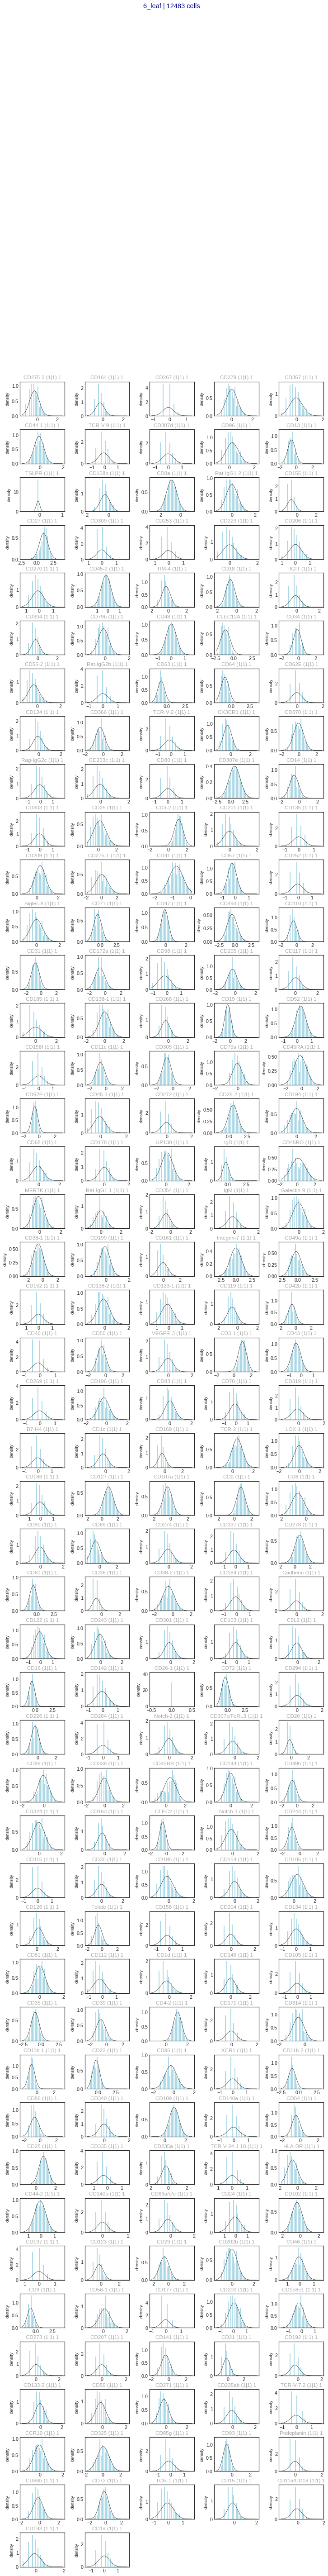

In [82]:
node_ID = 6


traversal.plot_node(data,node_ID,viz_dim=1)

In [88]:
node = traversal.get_node(6)
node.

{'bp_ncluster': 1,
 'bp_clustering': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [89]:
node = traversal.get_node(6)
node.val_cnt[node.val_cnt>100]

CD107a         101.0
CD62P          342.0
TCR-2          112.0
CD31           334.0
CD35           375.0
CD29           106.0
CD4-1         2771.0
CD3-1          220.0
CD27           401.0
CD45RA         105.0
CD45RO         135.0
CD11b-1        252.0
CD11b-2        183.0
CLEC12A        221.0
CD38-1         143.0
CD49d          302.0
CD49a          151.0
CD44-2         142.0
CD44-1         131.0
CD127          219.0
CD278          178.0
CD16           111.0
CD14           106.0
CD26-2         197.0
CD18           345.0
CD71           123.0
CD73           157.0
CD305          136.0
CD2            254.0
CD9            166.0
CD61           135.0
CD275-1        105.0
CD49b          120.0
CD64           137.0
CD63           183.0
CD45-2         283.0
CD102          196.0
CD109          272.0
Integrin-7     231.0
CD8a           187.0
CD52           141.0
CD55           140.0
CD93           326.0
CD244          147.0
CD325          116.0
CD307e         589.0
CD172a         140.0
CLEC2        

In [ ]:
import diptest
diptest.dipstat(data.loc[node.indices,'CD8a'])
# len(data.loc[node.indices,'CD158'])

In [ ]:
traversal.plot_node_umap(data, nodeID=6)

In [ ]:
traversal.plot_node_2dim_new(data, 7, 'CD27', 'CD16')
# traversal.plot_node_2dim_new(data, 20, 'CD8a', 'CD4')
# traversal.plot_node_2dim_new(data, 2, 'CD4-1', 'CD19')

In [ ]:
score_ll = traversal.get_ll(4)
print('likelyhood gain:')
for key,value in score_ll.items():
    print(key,round(value,3))

## visualize the key marker in a certain node
#### the node ID is just the number before the node name in tree.pdf

In [ ]:
plot_keymarker(data,traversal,node_ID=2,dpi=128)

In [ ]:
from scipy.stats import multivariate_normal, norm
import numpy as np

def assign_GMM(sample, mean_list, cov_list, weight, if_log=False, marker_list=None):
    # print(cov_list)
    index = sample.index
    # sample = np.array(sample)
    weight = np.array(weight)
    if if_log:
        type_num = np.log(weight/sum(weight))
    else:
        type_num = weight/sum(weight)
    
    p_prior = np.zeros(shape=(len(sample),len(weight)))
    for i in range(len(weight)):
        if if_log:
            # print(i)
            p_prior[:,i] = multivariate_normal.logpdf(np.array(sample.loc[:,marker_list]), mean=np.array(mean_list[i][marker_list]), cov=np.array(cov_list[i].loc[marker_list,marker_list]),allow_singular=True)
            p_prior[:,i] = p_prior[:,i] + type_num[i]
            
        else:
            
            # print([cov_list[i][j,j] for j in range(len(cov_list[i]))])
            # print(sample.loc[:,marker_list[i]])
            # print(mean_list[i])
            # print(cov_list[i])
            p_prior[:,i] = multivariate_normal.pdf(np.array(sample.loc[:,marker_list[i]]), mean=np.array(mean_list[i]), cov=np.array(cov_list[i]))   
            p_prior[:,i] = p_prior[:,i] * type_num[i]
    # p_prior = -p_prior 
    
    p_post = p_prior / (p_prior.sum(axis=1)[:,np.newaxis] )
    pred_label = np.argmin(p_post,axis=1)
    # print(p_prior[:10,:])
    # print(pred_label[:10])
    pred_label = pd.Series(data=pred_label,index=index)
    return pred_label

In [ ]:
leaf_list = traversal.nodelist.copy()
leaf_list.pop(0)
leaf_list.pop(0)
leaf_list.pop(1)

In [ ]:
node = traversal.get_node(3)
mean_list = [node.mean for node in leaf_list] 
cov_list = [node.cov for node in leaf_list]
w_list = [node.weight for node in leaf_list]
simulator = pd.read_csv('../simulator/ADT_simulator_9_10.csv', sep=',', index_col=0, header=0)
raw_label = assign_GMM(simulator, mean_list, cov_list, w_list, if_log=True,marker_list=['CD4-1','CD19','CD16','CD8'])
add_label = assign_GMM(simulator, mean_list, cov_list, w_list, if_log=True,marker_list=['CD4-1','CD19','CD16','CD8','CD3-1'])
#### 尝试用所有cutof<0.5的feature来assign，相当于是一个高维的gate

In [ ]:
import umap
import umap.plot
import matplotlib.pyplot as plt

mapper = umap.UMAP().fit(simulator)
umap.plot.points(mapper, labels=raw_label)
umap.plot.points(mapper, labels=add_label)

In [ ]:
raw_label.iloc[20675:].value_counts()
# add_label.iloc[20675:].value_counts()

In [ ]:
# add_label.index = simulator.index
simulator[raw_label==3].to_csv('../simulator/ADT_simulator_9_11.csv')

In [ ]:
from CITEsort.Visualize import visualize_2dim

visualize_2dim(simulator[raw_label==3]['CD3-1'],simulator[raw_label==3]['CD8'],raw_label[raw_label==3])
visualize_2dim(simulator[add_label==3]['CD3-1'],simulator[add_label==3]['CD8'],add_label[add_label==3])

In [ ]:
keys = []
for i in range(28):
    node = traversal.get_node(i)
    if list(node.key) != 'leaf':
        print(node.key)

In [ ]:
'IgD',
'CD26-1',
'CD72',
'CD4-1',
'CD27', 'CD8a
'CD8a',
'CD244',
'CD4-1',
'CD27',
'CD244',
'CD158', 'CD21',
'CD3-1'